## Carga de datos y librerias

In [ ]:
# Importacion de librerias
import pandas as pd
import numpy as np

In [ ]:
# Importar archivo desde drive
url='https://drive.google.com/file/d/1h1z5Gj3o24dG3_q16QNRfuuAl5hlBVuf/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
datadrive = pd.read_csv(dwn_url, sep =",")

## Exploracion de datos

In [ ]:
# se extraen las primeras 5 filas para ver los datos
datadrive.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Nombre de las columnas
datadrive.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# Numero de filas y columnas
datadrive.shape

(1338, 7)

In [ ]:
# Tipo de datos de cada columna
datadrive.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## limpieza y duplicados

In [ ]:
# Se ve la informacion de las columnas, con el proposito de saber que contiene cada una asi como si tiene valores unicos o repetidos (categorias)
for col in datadrive.columns:
    print("-"*20 + col+"-"*20)
    display(datadrive[col].value_counts())

--------------------age--------------------


18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

--------------------sex--------------------


male      676
female    662
Name: sex, dtype: int64

--------------------bmi--------------------


32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64

--------------------children--------------------


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

--------------------smoker--------------------


no     1064
yes     274
Name: smoker, dtype: int64

--------------------region--------------------


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

--------------------charges--------------------


1639.56310     2
8825.08600     1
43254.41795    1
5257.50795     1
1980.07000     1
              ..
12269.68865    1
6360.99360     1
7371.77200     1
16420.49455    1
34254.05335    1
Name: charges, Length: 1337, dtype: int64

In [ ]:
# Se buscan nulos
datadrive.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Se buscan duplicados
datadrive[datadrive.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Aparece un duplicado, sin embargo como es muy ambiguo en este caso saber si en verdad se trata de un duplicado o no, no es recomendable eliminarlo, las variables son muy genericas para saber si en verdad es un duplicado 

In [ ]:
datadrive[(datadrive.age==19) & (datadrive.charges==1639.5631)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
"""La funcion nunquite nos permite saber cuantos valores diferentes hay en cada columna, es similar a lo que se hizo al inicio, 
   con la diferencias de que aui solo extraemos el numero de valores unicos y no cuales son"""
datadrive.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
datadrive.charges.value_counts()

1639.56310     2
8825.08600     1
43254.41795    1
5257.50795     1
1980.07000     1
              ..
12269.68865    1
6360.99360     1
7371.77200     1
16420.49455    1
34254.05335    1
Name: charges, Length: 1337, dtype: int64

La prima del seguro al tener tantos casi en su totalidad todos los valores unicos no hay mucho que se pueda hacer con ella, seria agrupar los valores en rangos o bien eliminarla, dpendiendo de cual sea nuestro objetivo.

Algo similar llega a pasar con el indicer de masa corporar, aunque los calores unicos sean menores sigune siendo demasiados para graficarlos como posteriormete se hara 

## Graficacion

In [ ]:
# Librerias para hacer graficos 
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
data = go.Box(y = datadrive["age"])
layout = go.Layout(title = "Edades de personas")
fig = go.Figure(data = data, layout = layout)
fig.show()

Se pued eobservar un boxplor con las edades de las personas del dataframe, estando estas mas concentardas entre los 27 y 51 años, teniendo la media como 39 

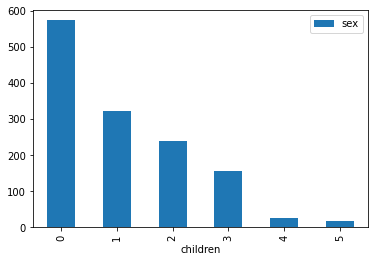

In [ ]:
datadrive[["sex","children"]].groupby("children").count().plot(kind="bar")

En la grafica anteriro se puede obervar la cantidad de niños que las personas tienen en el dataset, a malo grsos esta informacion es correcta solo se tendria que ajustar la etiqueta o hacerlo de una mejor manera como en el siguiente donde se puede ver de una mejor manera la informacion

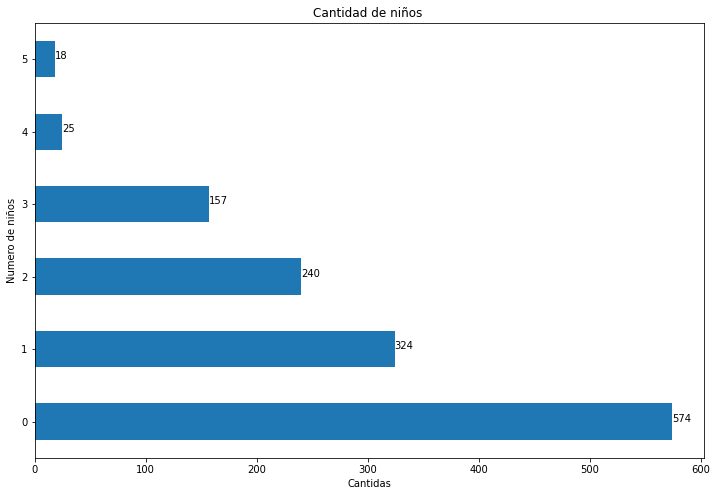

In [ ]:
datadrive.children.value_counts().plot(kind="barh",figsize=(12,8))
for index, value in enumerate(datadrive.children.value_counts()):
    plt.text(value, index, str(value))
plt.title("Cantidad de niños ")
plt.ylabel("Numero de niños")
plt.xlabel('Cantidas')
plt.show()

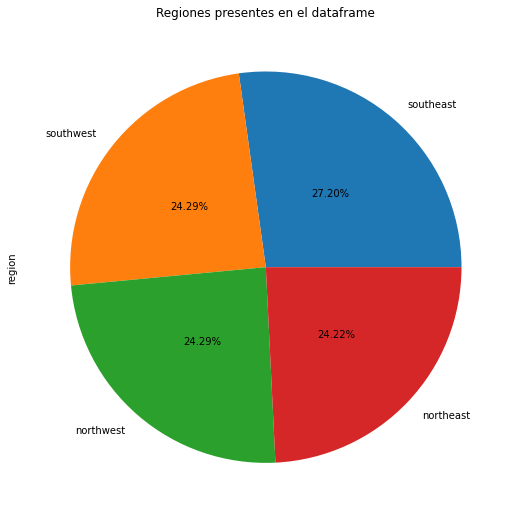

In [ ]:
datadrive["region"].value_counts().plot(kind="pie", subplots=True, figsize=(9,9),autopct='%.2f%%', legend=False,pctdistance=.5)
plt.title("Regiones presentes en el dataframe")
# plt.legend(loc="upper left")
plt.show()

En el anteriro grafico se puede observar que casi la distribucion entre las 4 regiones es igual, difieren por poco a excepcion de southeast

Se intenta de buscar una correracion entre las variables numericas o una relacion mediante las garficas

In [ ]:
datadrive[["bmi","age"]].corr()

,bmi,age
bmi,1.000000,0.109272
age,0.109272,1.000000


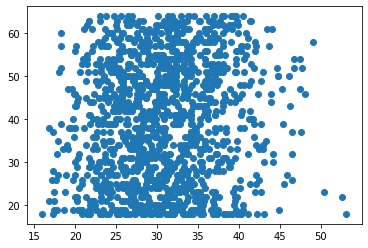

In [ ]:
x = datadrive.bmi
y = datadrive.age
plt.scatter(x, y)
plt.show()

In [ ]:
datadrive[["charges","age"]].corr()

,charges,age
charges,1.000000,0.299008
age,0.299008,1.000000


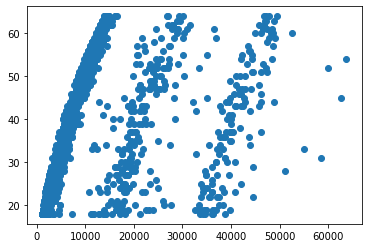

In [ ]:
x = datadrive.charges
y = datadrive.age
plt.scatter(x, y)
plt.show()

In [ ]:
datadrive[["bmi","charges"]].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


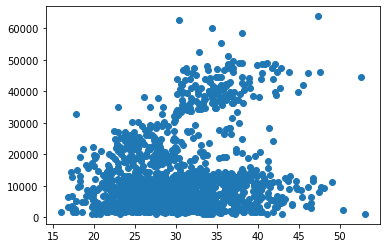

In [ ]:
x = datadrive.bmi
y = datadrive.charges
plt.scatter(x, y)
plt.show()

In [ ]:
datadrive[["children","age"]].corr()

,children,age
children,1.000000,0.042469
age,0.042469,1.000000


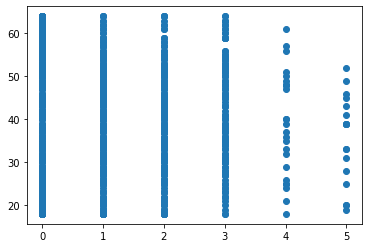

In [ ]:
x = datadrive.children
y = datadrive.age
plt.scatter(x, y)
plt.show()